<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.tail(10)

Invoice ID Branch       City Customer type  Gender  \
993   690-01-6631      B   Mandalay        Normal    Male   
994   652-49-6720      C  Naypyitaw        Member  Female   
995   233-67-5758      C  Naypyitaw        Normal    Male   
996   303-96-2227      B   Mandalay        Normal  Female   
997   727-02-1313      A     Yangon        Member    Male   
998   347-56-2442      A     Yangon        Normal    Male   
999   849-09-3807      A     Yangon        Member  Female   
1000  849-09-3807      A     Yangon        Member  Female   
1001  745-74-0715      A     Yangon        Normal    Male   
1002  452-04-8808      B   Mandalay        Normal    Male   

                Product line  Unit price  Quantity   Tax 5%      Total  \
993      Fashion accessories         NaN      10.0   8.7450   183.6450   
994   Electronic accessories         NaN       1.0   3.0475    63.9975   
995        Health and beauty         NaN       1.0   2.0175    42.3675   
996       Home and lifestyle         NaN      10.0  48.6900  1022.4900   
997       Food and beverages         NaN       1.0   1.5920    33.4320   
998       Home and lifestyle       65.82       1.0   3.2910    69.1110   
999      Fashion accessories       88.34       7.0  30.9190   649.2990   
1000     Fashion accessories       88.34       7.0  30.9190   649.2990   
1001  Electronic accessories         NaN       2.0   5.8030   121.8630   
1002  Electronic accessories       87.08       NaN  30.4780   640.0380   

         Date   Time  Payment    cogs  gross margin percentage  gross income  \
993   2/22/19  18:35  Ewallet  174.90                 4.761905        8.7450   
994   2/18/19  11:40  Ewallet   60.95                 4.761905        3.0475   
995   1/29/19  13:46  Ewallet   40.35                 4.761905        2.0175   
996    3/2/19  17:16  Ewallet  973.80                 4.761905       48.6900   
997    2/9/19  13:22     Cash   31.84                 4.761905        1.5920   
998   2/22/19  15:33     Cash   65.82                 4.761905        3.2910   
999   2/18/19  13:28     Cash  618.38                 4.761905       30.9190   
1000  2/18/19  13:28     Cash  618.38                 4.761905       30.9190   
1001  3/10/19  20:46  Ewallet  116.06                 4.761905        5.8030   
1002  1/26/19  15:17     Cash  609.56                 4.761905       30.4780   

      Rating  
993      6.6  
994      5.9  
995      6.2  
996      4.4  
997      7.7  
998      4.1  
999      6.6  
1000     6.6  
1001     8.8  
1002     5.5

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

OptionError: No such keys(s): 'mode.use_inf_as_null'

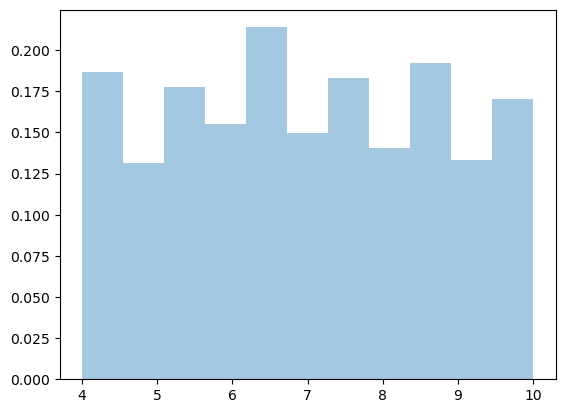

In [5]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25th-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--')
plt.legend()

array([[<AxesSubplot: title={'center': 'Unit price'}>,
        <AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'Tax 5%'}>],
       [<AxesSubplot: title={'center': 'Total'}>,
        <AxesSubplot: title={'center': 'cogs'}>,
        <AxesSubplot: title={'center': 'gross margin percentage'}>],
       [<AxesSubplot: title={'center': 'gross income'}>,
        <AxesSubplot: title={'center': 'Rating'}>, <AxesSubplot: >]],
      dtype=object)

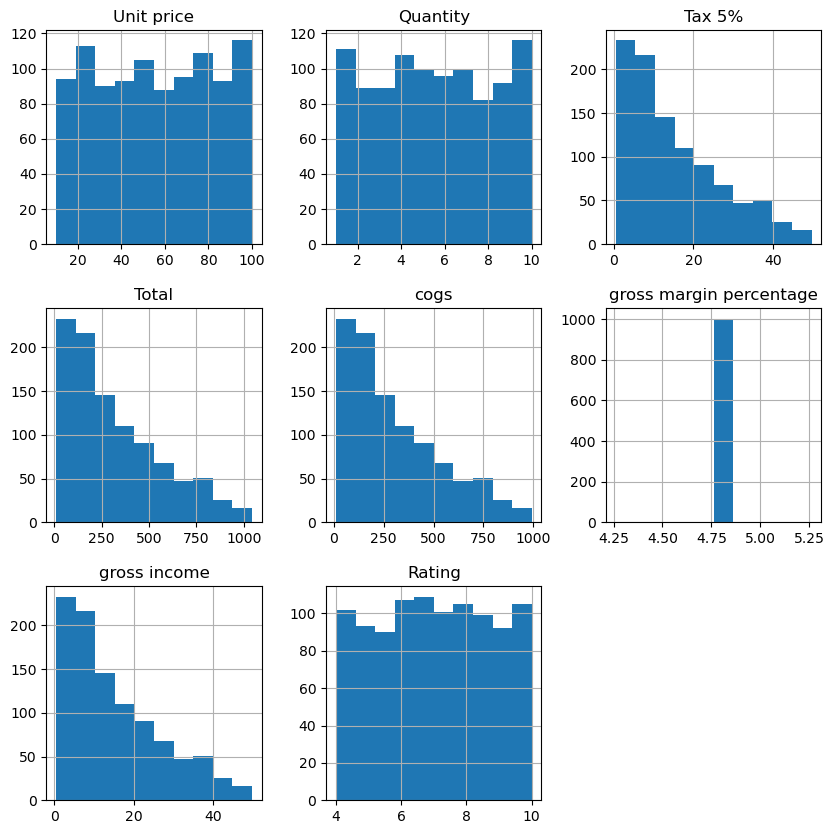

In [6]:
df.hist(figsize=(10, 10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot: xlabel='Branch', ylabel='count'>

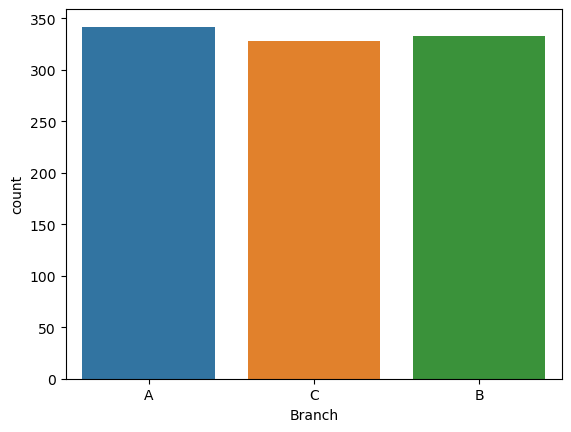

In [7]:
sns.countplot(x='Branch', data=df)

In [8]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

<AxesSubplot: xlabel='Payment', ylabel='count'>

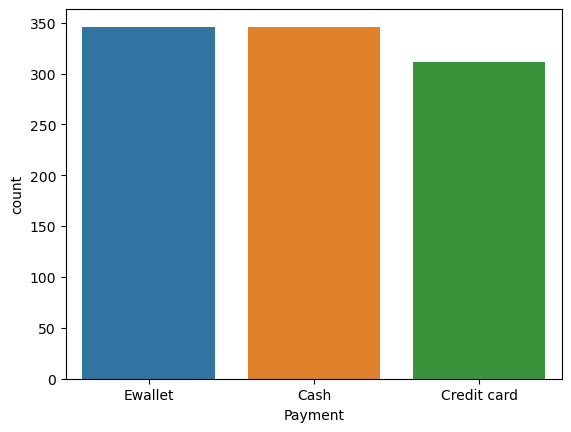

In [9]:
sns.countplot(x='Payment', data=df)

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

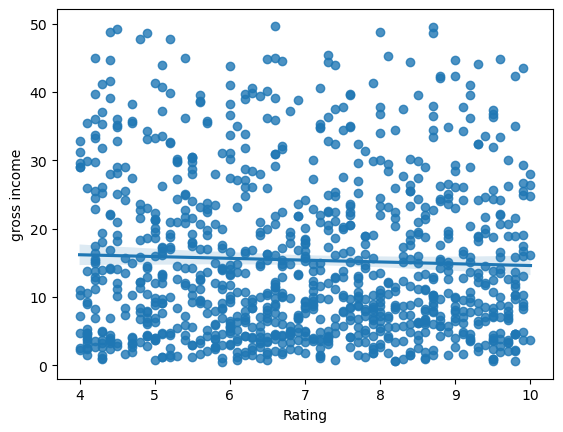

In [10]:
sns.regplot(x='Rating', y='gross income', data=df)

<AxesSubplot: xlabel='Branch', ylabel='gross income'>

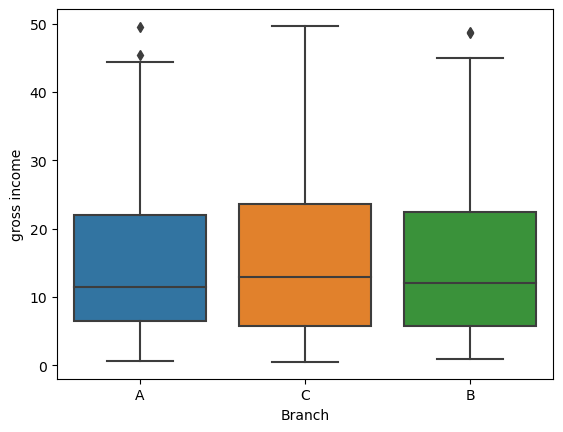

In [11]:
sns.boxplot(x='Branch', y='gross income', data=df)

<AxesSubplot: xlabel='Gender', ylabel='gross income'>

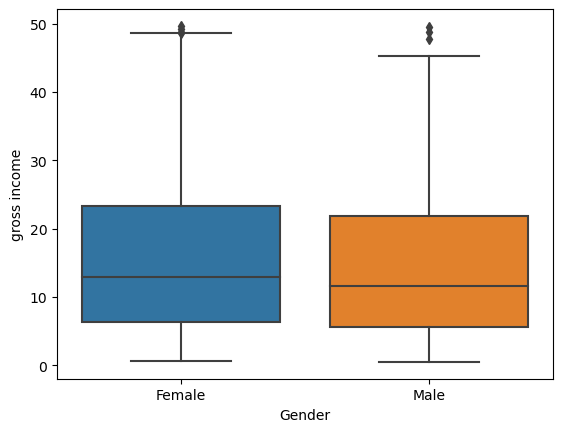

In [12]:
sns.boxplot(x='Gender', y='gross income', data=df)

**Question 4:** Is there a noticeable time trend in gross income?

In [13]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [14]:
df.select_dtypes(include=['number']).groupby(df.index).mean().index

RangeIndex(start=0, stop=1003, step=1)

OptionError: No such keys(s): 'mode.use_inf_as_null'

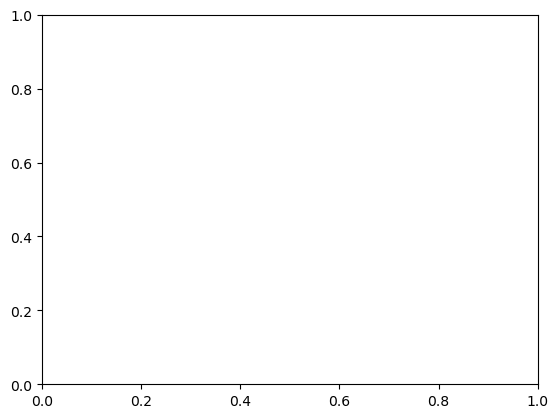

In [15]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Grouping by index and calculating the mean
mean_df = numeric_df.groupby(numeric_df.index).mean()

# Ensure no NaN or infinite values in 'gross income'
mean_df = mean_df[mean_df['gross income'].notna()]  # Removing NaN values
mean_df = mean_df[np.isfinite(mean_df['gross income'])]  # Removing infinite values

# Plotting the lineplot for 'gross income' against the index
sns.lineplot(x=mean_df.index, y=mean_df['gross income'])

OptionError: No such keys(s): 'mode.use_inf_as_null'

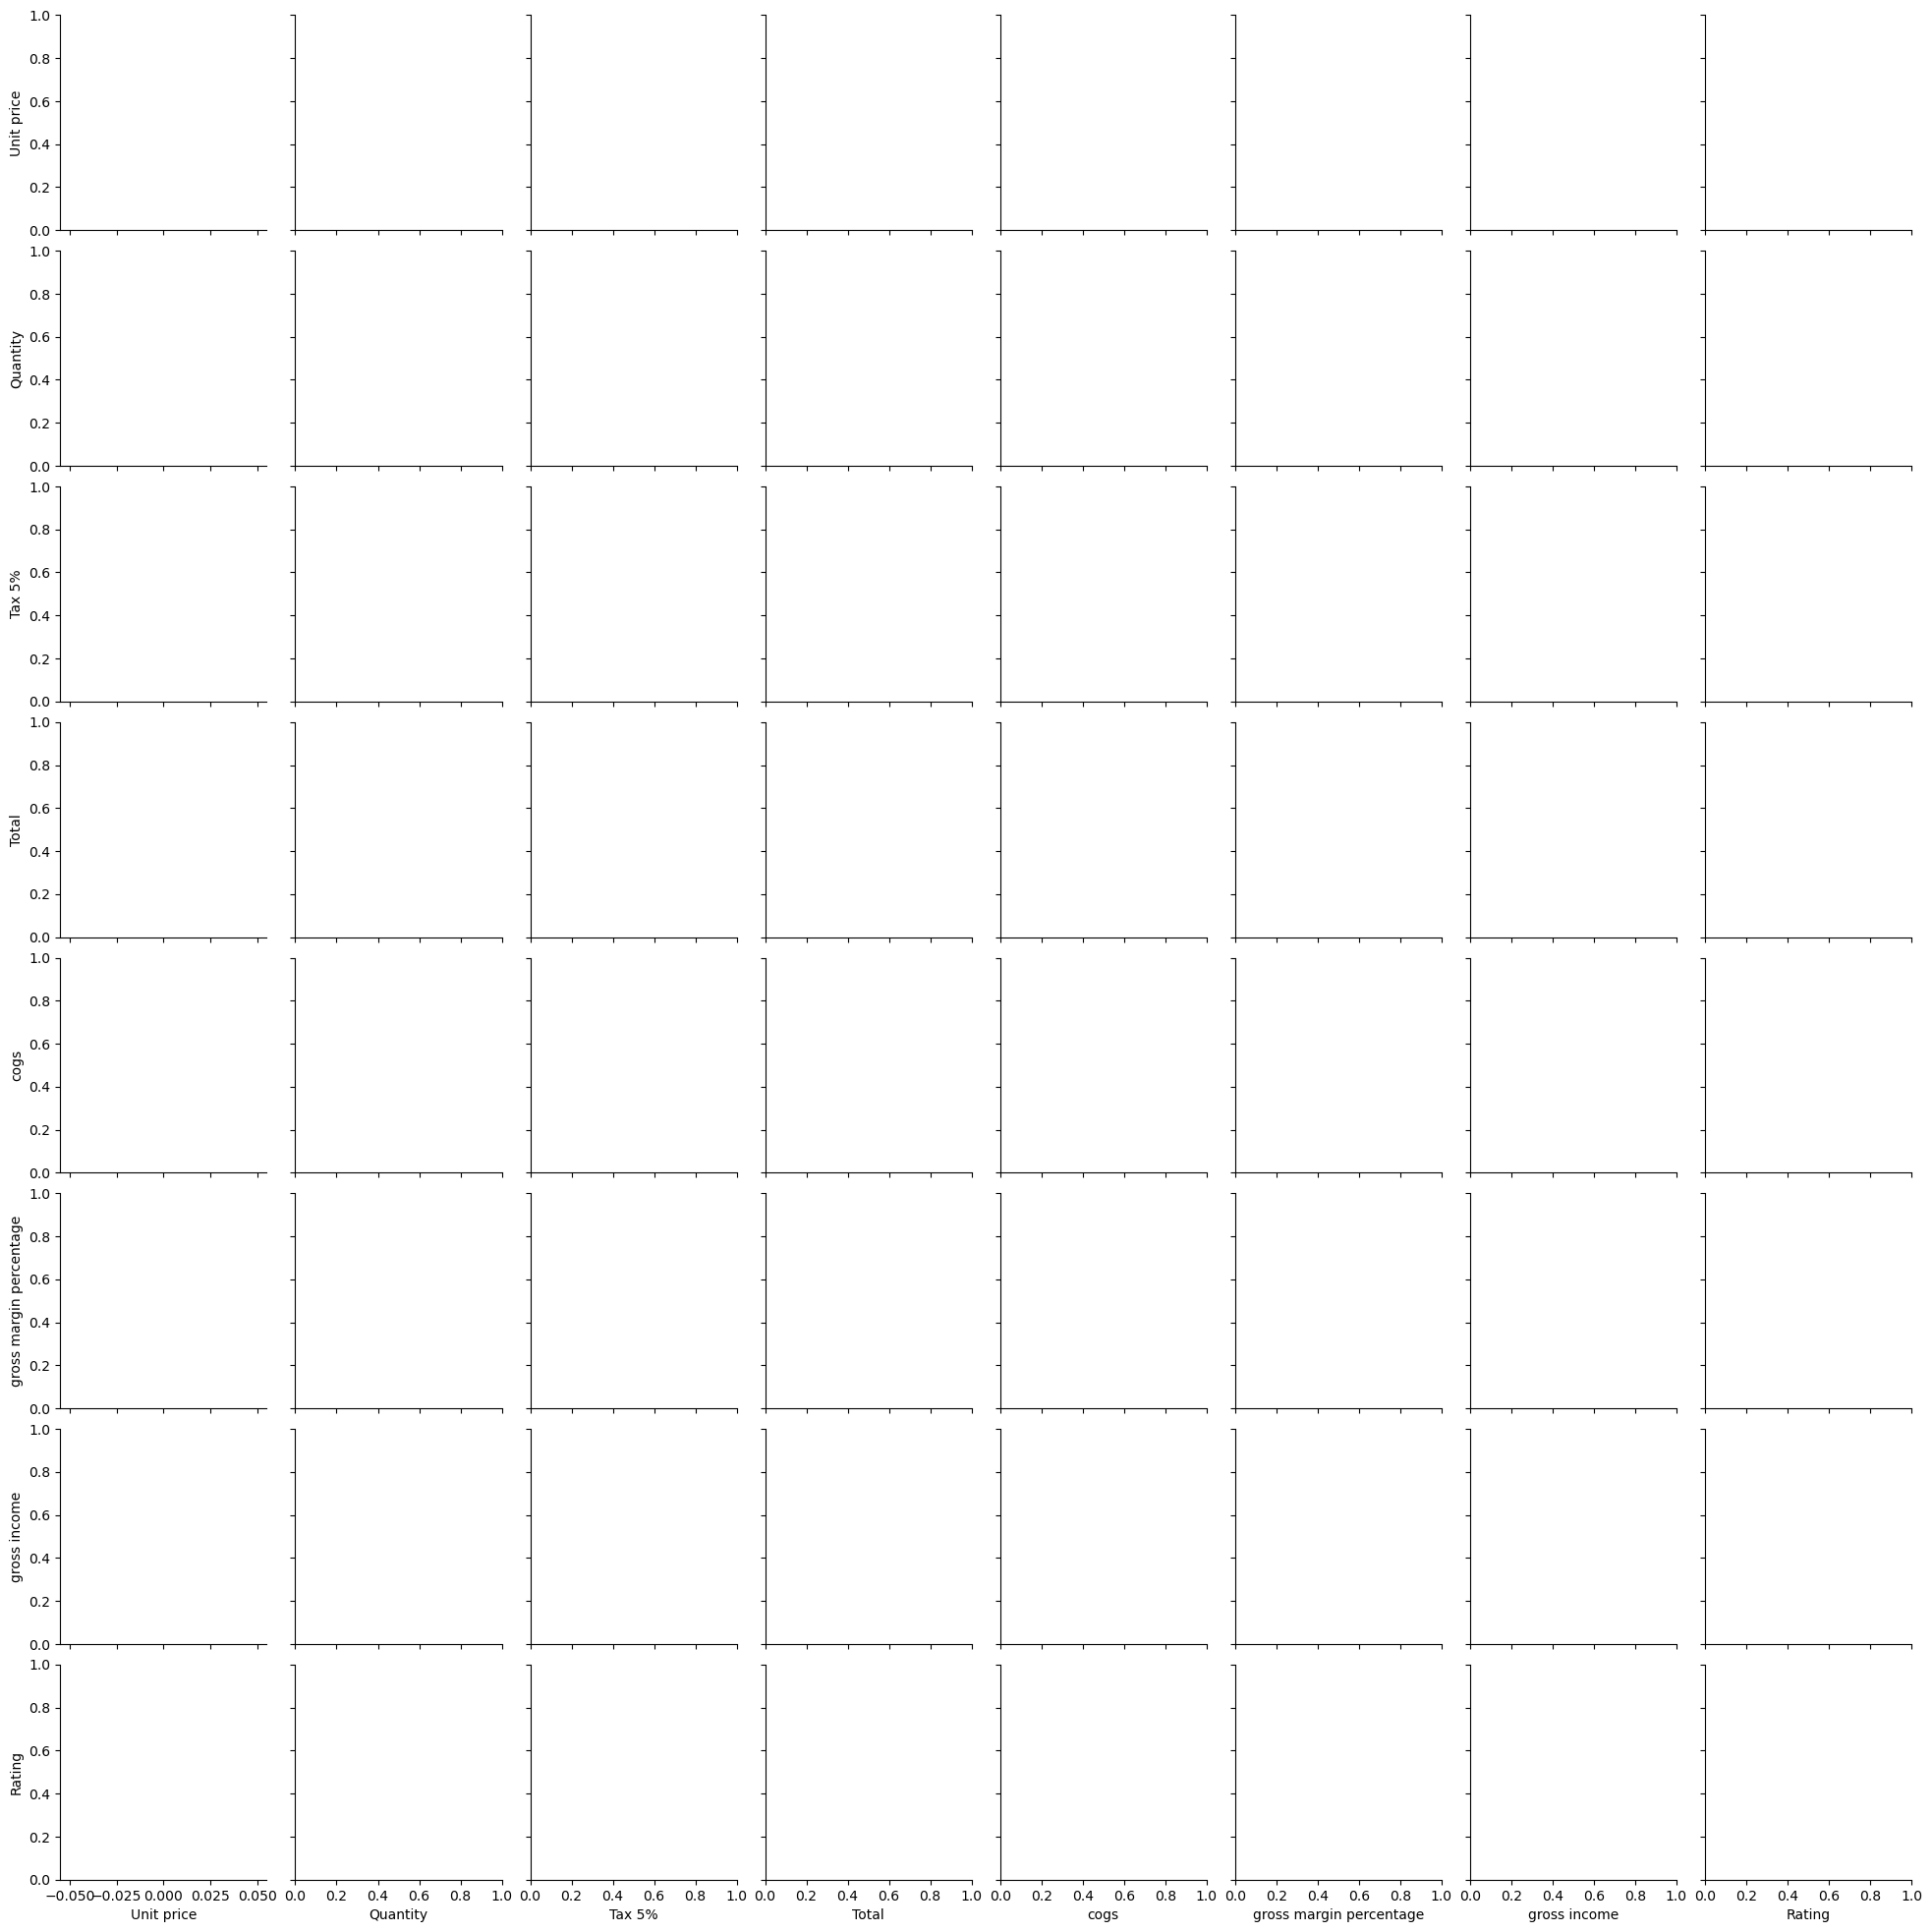

In [16]:
clean_df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Generate a pairplot with the cleaned dataset
sns.pairplot(clean_df)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [18]:
df.duplicated().sum()

3

In [19]:
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total     Date  \
1000     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1001  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
1002  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

       Time  Payment    cogs  gross margin percentage  gross income  Rating  
1000  13:28     Cash  618.38                 4.761905        30.919     6.6  
1001  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
1002  15:17     Cash  609.56                 4.761905        30.478     5.5

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.isna().sum() / len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Date                       0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<AxesSubplot: >

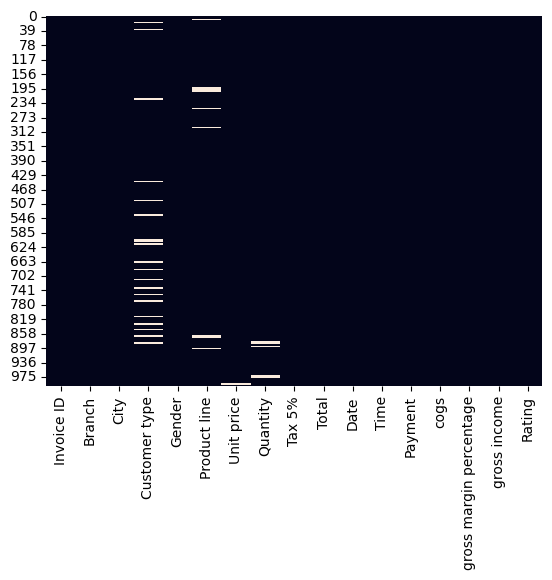

In [25]:
sns.heatmap(df.isnull(), cbar=False)

In [24]:
df.fillna(df.mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [27]:
df.fillna(df.mode().iloc(0), inplace=True)

AttributeError: '_iLocIndexer' object has no attribute 'astype'

In [31]:
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [37]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0], 2)

-0.04

In [41]:
np.round(df.select_dtypes(include=[np.number]).corr(), 2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.02    0.63   0.63  0.63   
Quantity                       0.02      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.71   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot: >

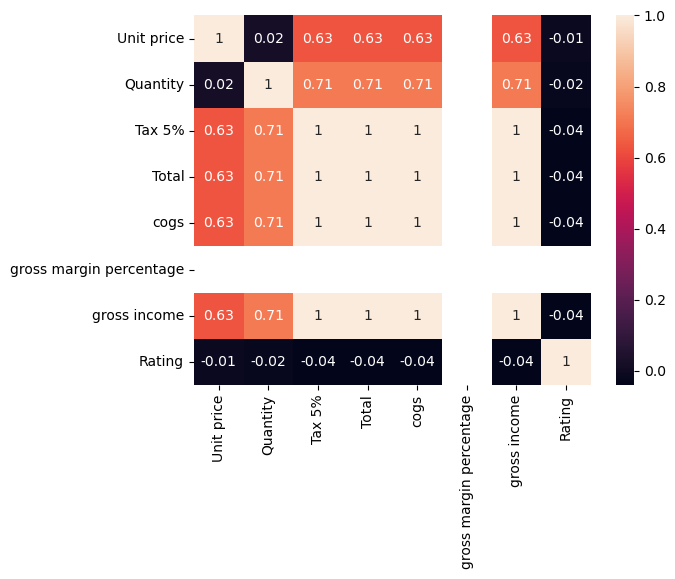

In [43]:
sns.heatmap(np.round(df.select_dtypes(include=[np.number]).corr(), 2), annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/